# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

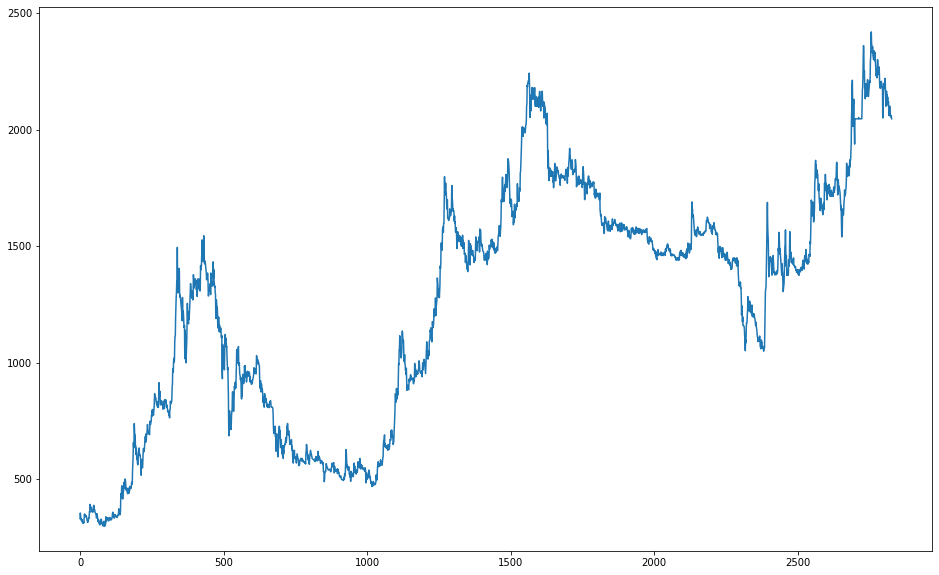

In [17]:
dataset = pd.read_csv('stock_dataset.csv')
df= dataset[(dataset != 0).all(1)]
plt.figure(figsize=(16,10))
plt.plot(df['last_traded_price'], label='Traded Price history')

## Splitting the dataset into the Training set and Test set

In [3]:
train = df[:2175]
test = df[2175:]

x_train = train.drop(['last_traded_price', 'trading_code', 'date'], axis=1)
y_train = train['last_traded_price']
x_test = test.drop(['last_traded_price', 'trading_code', 'date'], axis=1)
y_test = test['last_traded_price']

## Training the Random Forest Regression model on the test set

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)


## Evaluating the Model Performance

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9934134888833361

In [10]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print (rms)

29.148768030851514


Text(0.5, 1.0, 'Actual vs predicted')

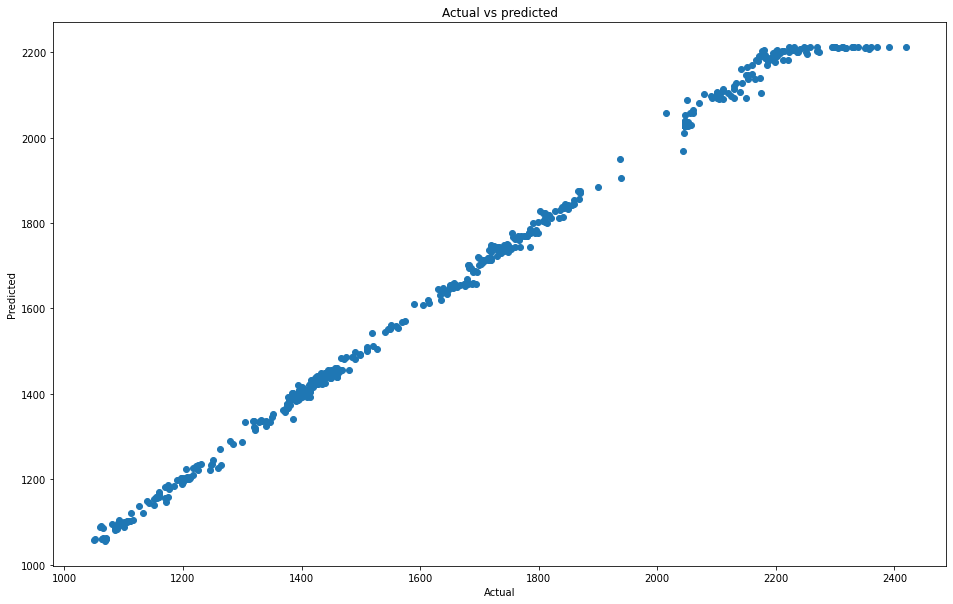

In [16]:
plt.figure(figsize=(16,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


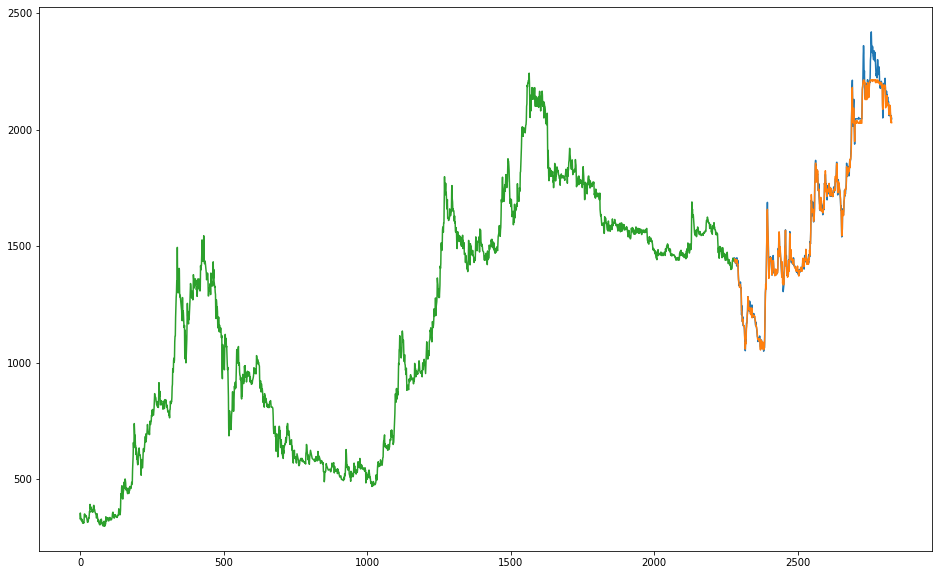

In [15]:
test['Predictions'] = 0
test['Predictions'] = y_pred
plt.figure(figsize=(16,10))
plt.plot(test[['last_traded_price', 'Predictions']])
plt.plot(train['last_traded_price'])